In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# Reading the dataset

In [81]:
data1=pd.read_csv('/content/bank-full.csv',sep=';')
data1.head()
bank1=pd.DataFrame(data1)
bank1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## EDA

In [82]:
bank1.shape

(45211, 17)

In [83]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [84]:
bank1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [85]:
bank1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [86]:
bank1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [87]:
bank1[bank1.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [88]:
bank1.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [89]:
bank1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<Axes: >

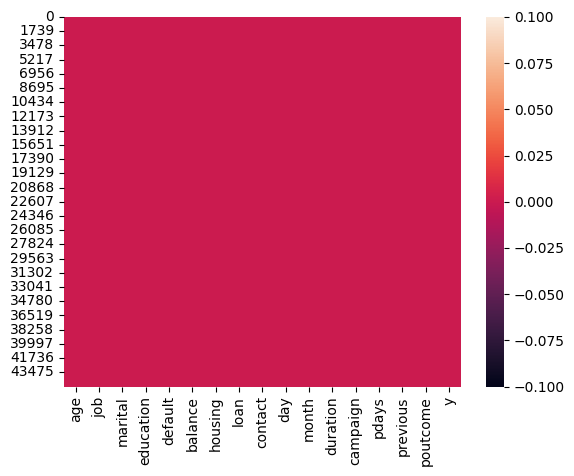

In [90]:
sns.heatmap(bank1.isnull())

In [91]:
bank1['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [92]:
bank1['job']=pd.Categorical(bank1['job'])
bank1['job']=bank1['job'].cat.codes

In [93]:
bank1['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [94]:
bank1['marital']=pd.Categorical(bank1['marital'])
bank1['marital']=bank1['marital'].cat.codes

In [95]:
bank1['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [96]:
bank1['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [97]:
bank1['education']=pd.Categorical(bank1['education'])
bank1['education']=bank1['education'].cat.codes

In [98]:
bank1['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [99]:
bank1['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [100]:
bank1['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [101]:
bank1['contact']=pd.Categorical(bank1['contact'])
bank1['contact']=bank1['contact'].cat.codes

In [102]:
bank1['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [103]:
def custom_map(month):
  month_mapping={
      'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,
      'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12
      }
  return month_mapping.get(month.lower(),None)
  bank1['month']=bank1['month'].apply(custom_map)
  month.dtype()

In [104]:
bank1['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [105]:
bank1['poutcome']=pd.Categorical(bank1['poutcome'])
bank1['poutcome']=bank1['poutcome'].cat.codes

In [106]:
bank1['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [107]:
bank1['default']= bank1['default'].replace({'yes':1,'no':0}).astype(int)

In [108]:
bank1['housing']= bank1['housing'].replace({'yes':1,'no':0}).astype(int)
bank1['loan']= bank1['loan'].replace({'yes':1,'no':0}).astype(int)
bank1['y']= bank1['y'].replace({'yes':1,'no':0}).astype(int)

In [109]:
bank1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,may,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,may,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,may,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,nov,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,nov,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,nov,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,nov,508,4,-1,0,3,0


In [110]:
bank1.corr()

<ipython-input-110-923ec2bcc656>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bank1.corr()


,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


<ipython-input-111-76a77a924508>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.pairplot(bank1.corr())


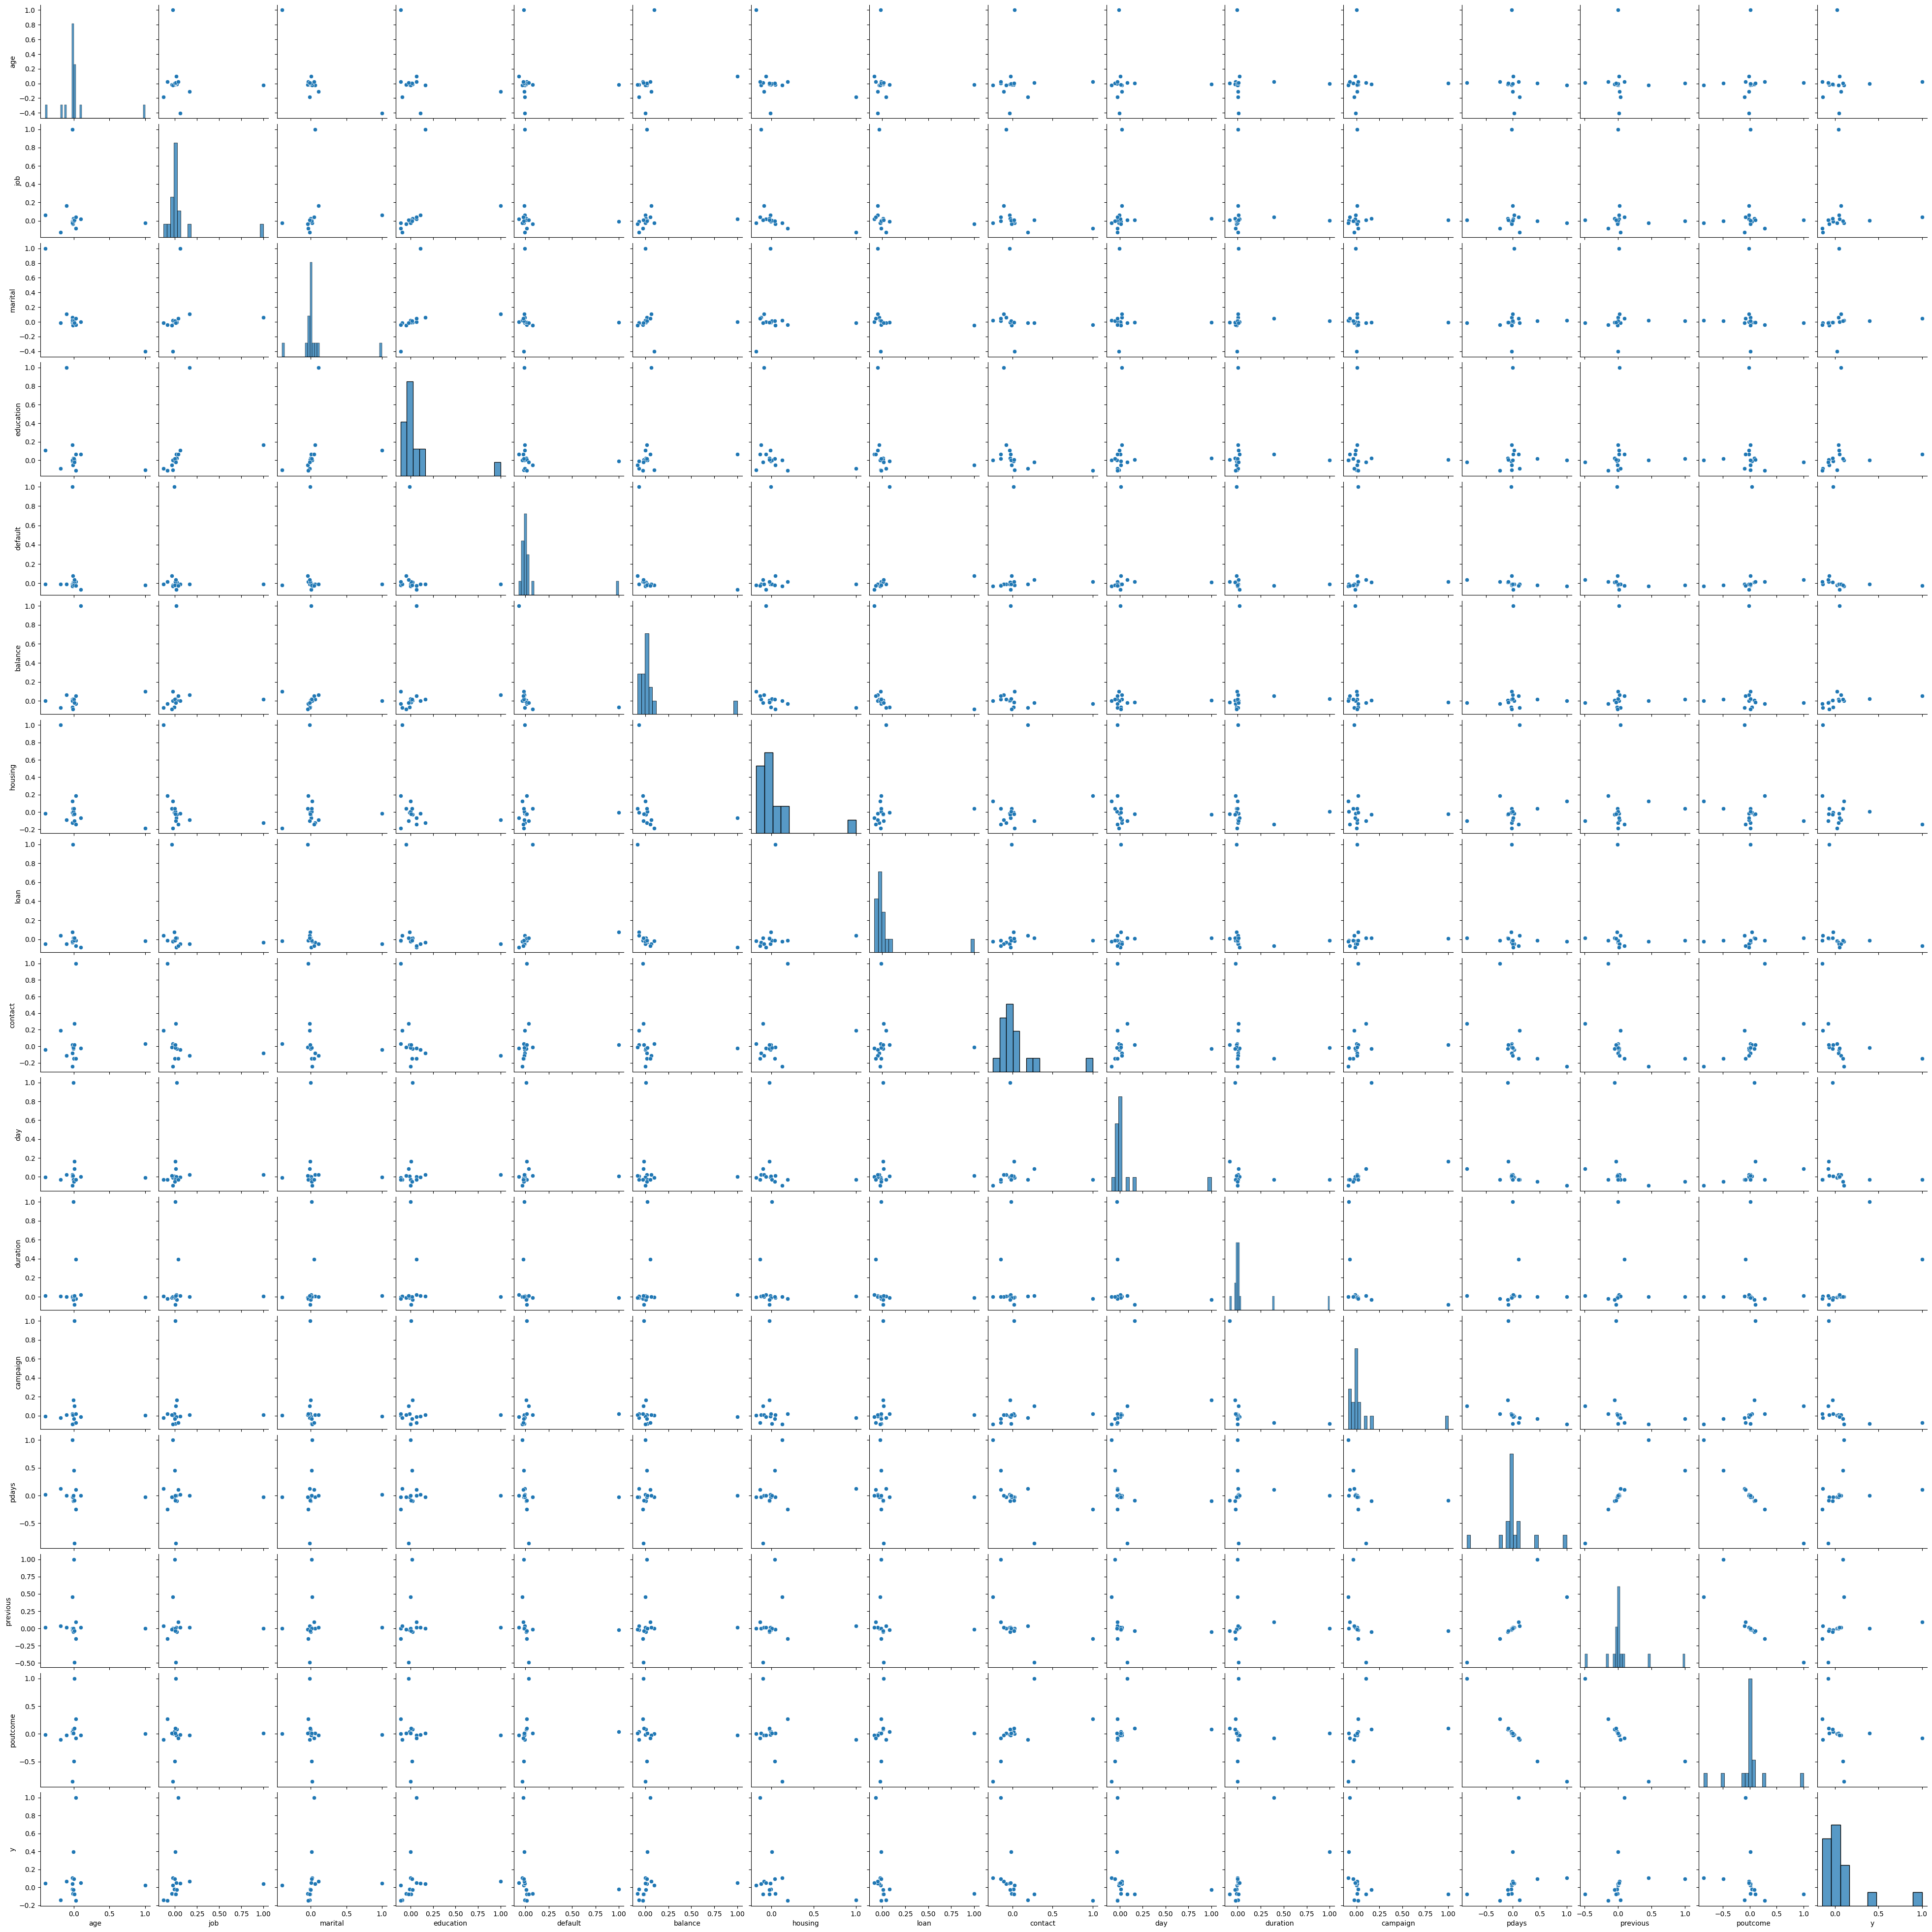

In [111]:
sns.pairplot(bank1.corr())

Checking the outliers

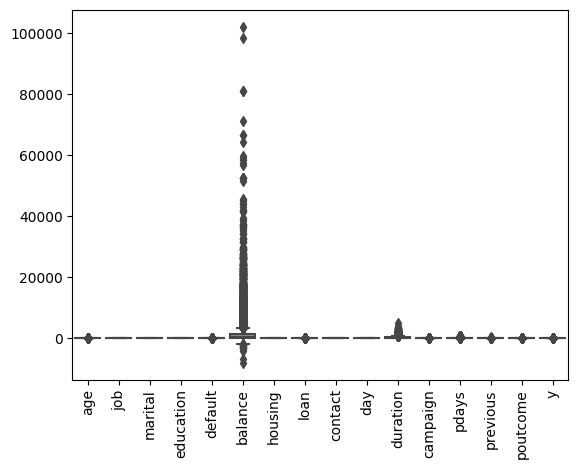

In [112]:
box=sns.boxplot(data=bank1)
plt.xticks(rotation=90)
plt.show()

In [113]:
from sklearn.preprocessing import MinMaxScaler

In [114]:
A=bank1[['balance']]
B=bank1[['duration']]
C=bank1[['pdays']]

In [115]:
scaler=MinMaxScaler()

In [116]:
bank1['balance']=scaler.fit_transform(A)

In [117]:
bank1['duration']=scaler.fit_transform(B)
bank1['pdays']=scaler.fit_transform(C)

In [118]:
bank1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,0.092259,1,0,2,5,may,0.053070,1,0.000000,0,3,0
1,44,9,2,1,0,0.073067,1,0,2,5,may,0.030704,1,0.000000,0,3,0
2,33,2,1,1,0,0.072822,1,1,2,5,may,0.015453,1,0.000000,0,3,0
3,47,1,1,3,0,0.086476,1,0,2,5,may,0.018707,1,0.000000,0,3,0
4,33,11,2,3,0,0.072812,0,0,2,5,may,0.040260,1,0.000000,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,0.080293,0,0,0,17,nov,0.198658,3,0.000000,0,3,1
45207,71,5,0,0,0,0.088501,0,0,0,17,nov,0.092721,2,0.000000,0,3,1
45208,72,5,1,1,0,0.124689,0,0,0,17,nov,0.229158,5,0.212156,3,2,1
45209,57,1,1,1,0,0.078868,0,0,1,17,nov,0.103294,4,0.000000,0,3,0


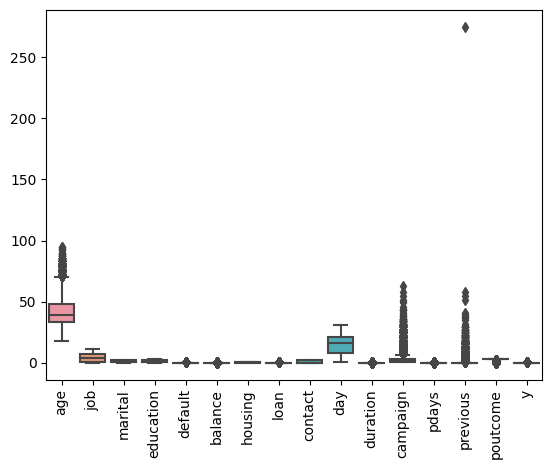

In [119]:
box=sns.boxplot(data=bank1)
plt.xticks(rotation=90)
plt.show()

In [120]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  int8   
 2   marital    45211 non-null  int8   
 3   education  45211 non-null  int8   
 4   default    45211 non-null  int64  
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  int64  
 7   loan       45211 non-null  int64  
 8   contact    45211 non-null  int8   
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  float64
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  float64
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  int8   
 16  y          45211 non-null  int64  
dtypes: float64(3), int64(8), int8(5), object(1)
memory usage: 4.4+ MB


Perform PP Score Matrix

In [121]:
!pip install ppscore

In [122]:
import ppscore as pps

In [123]:
pps.matrix(bank1)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.0,predict_itself,True,None,0.000000,1.000000,None
1,age,job,0.0,regression,True,mean absolute error,2.689400,2.741682,DecisionTreeRegressor()
2,age,marital,0.0,regression,True,mean absolute error,0.405600,0.412687,DecisionTreeRegressor()
3,age,education,0.0,regression,True,mean absolute error,0.540400,0.614811,DecisionTreeRegressor()
4,age,default,0.0,regression,True,mean absolute error,0.017800,0.034860,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
284,y,campaign,0.0,regression,True,mean absolute error,1.557600,1.795730,DecisionTreeRegressor()
285,y,pdays,0.0,regression,True,mean absolute error,0.046082,0.074804,DecisionTreeRegressor()
286,y,previous,0.0,regression,True,mean absolute error,0.572000,0.920264,DecisionTreeRegressor()
287,y,poutcome,0.0,regression,True,mean absolute error,0.436400,0.709295,DecisionTreeRegressor()


In [124]:
def custom_map(month):
    month_mapping = {
        'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
        'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
    }
    return month_mapping.get(month.lower(), None)

# Move this line outside of the custom_map function
bank1['month'] = bank1['month'].apply(custom_map)
bank1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,0.092259,1,0,2,5,5,0.053070,1,0.000000,0,3,0
1,44,9,2,1,0,0.073067,1,0,2,5,5,0.030704,1,0.000000,0,3,0
2,33,2,1,1,0,0.072822,1,1,2,5,5,0.015453,1,0.000000,0,3,0
3,47,1,1,3,0,0.086476,1,0,2,5,5,0.018707,1,0.000000,0,3,0
4,33,11,2,3,0,0.072812,0,0,2,5,5,0.040260,1,0.000000,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,0.080293,0,0,0,17,11,0.198658,3,0.000000,0,3,1
45207,71,5,0,0,0,0.088501,0,0,0,17,11,0.092721,2,0.000000,0,3,1
45208,72,5,1,1,0,0.124689,0,0,0,17,11,0.229158,5,0.212156,3,2,1
45209,57,1,1,1,0,0.078868,0,0,1,17,11,0.103294,4,0.000000,0,3,0


In [125]:
X=bank1.iloc[:,:16]
y=bank1.iloc[:,16]

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((36168, 16), (9043, 16), (36168,), (9043,))

Building and Checking the performance of the model

In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
bank1data=LogisticRegression()

In [130]:
bank1data.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [131]:
train_pred=bank1data.predict(X_train)
train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [132]:
test_pred=bank1data.predict(X_test)
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [133]:
train_proba=bank1data.predict_proba(X_train)
train_proba

array([[0.98611908, 0.01388092],
       [0.89041549, 0.10958451],
       [0.93375822, 0.06624178],
       ...,
       [0.90759957, 0.09240043],
       [0.97168145, 0.02831855],
       [0.98789851, 0.01210149]])

In [134]:
train_proba[:,1]

array([0.01388092, 0.10958451, 0.06624178, ..., 0.09240043, 0.02831855,
       0.01210149])

In [135]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [136]:
confusion_matrix(y_train,train_pred)

array([[31518,   452],
       [ 3513,   685]])

In [137]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     31970
           1       0.60      0.16      0.26      4198

    accuracy                           0.89     36168
   macro avg       0.75      0.57      0.60     36168
weighted avg       0.87      0.89      0.86     36168



In [138]:
train_proba=bank1data.predict_proba(X_train)
train_proba

array([[0.98611908, 0.01388092],
       [0.89041549, 0.10958451],
       [0.93375822, 0.06624178],
       ...,
       [0.90759957, 0.09240043],
       [0.97168145, 0.02831855],
       [0.98789851, 0.01210149]])

In [139]:
train_proba[:,1]

array([0.01388092, 0.10958451, 0.06624178, ..., 0.09240043, 0.02831855,
       0.01210149])

In [140]:
fpr,tpr,thresh=roc_curve(y_train,train_proba[:,1])

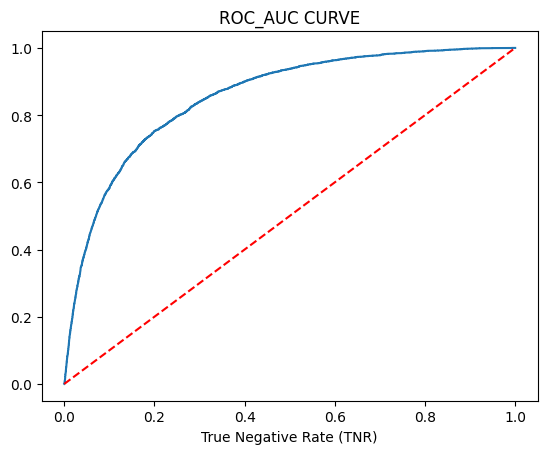

In [141]:
plt.plot(fpr,tpr)
plt.title('ROC_AUC CURVE')
plt.xlabel('True Negative Rate (TNR)')
plt.plot([0,1],[0,1],'r--')

In [142]:
roc_auc_score(y_train,train_proba[:,1])

0.854497814843388

In [143]:
confusion_matrix(y_test,test_pred)

array([[7830,  122],
       [ 911,  180]])

In [144]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.60      0.16      0.26      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.57      0.60      9043
weighted avg       0.86      0.89      0.86      9043



In [145]:
test_proba=bank1data.predict_proba(X_test)
test_proba

array([[0.97304185, 0.02695815],
       [0.95319476, 0.04680524],
       [0.90000546, 0.09999454],
       ...,
       [0.96851025, 0.03148975],
       [0.99422275, 0.00577725],
       [0.95483878, 0.04516122]])

In [146]:
test_proba[:,1]

array([0.02695815, 0.04680524, 0.09999454, ..., 0.03148975, 0.00577725,
       0.04516122])

In [147]:
fpr,tpr,thresh=roc_curve(y_test,test_proba[:,1])

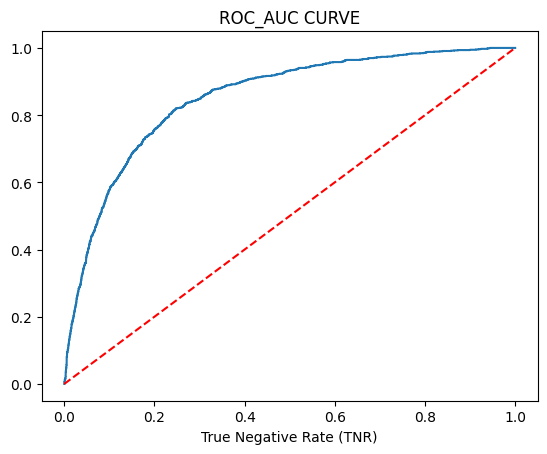

In [148]:
plt.plot(fpr,tpr)
plt.title('ROC_AUC CURVE')
plt.xlabel('True Negative Rate (TNR)')
plt.plot([0,1],[0,1],'r--')

In [149]:
roc_auc_score(y_test,test_proba[:,1])

0.8516837735856017

In [159]:
import statsmodels.api as sm

In [161]:
model = sm.OLS(y_train, X_train).fit()

In [162]:
def get_standardized_values(vals):
  return(vals-vals.mean())/vals.std()

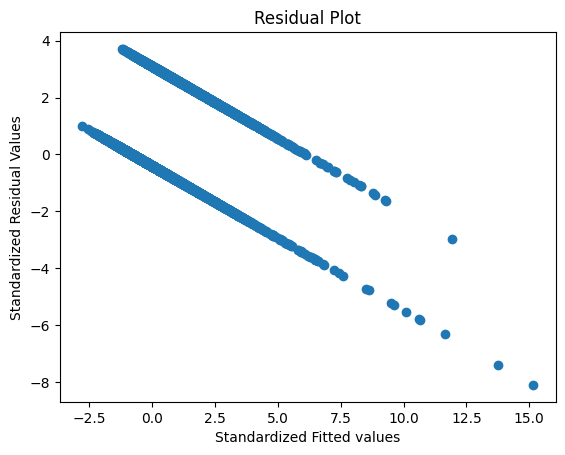

In [163]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized Residual Values')
plt.show()

Performing the Up-Sampling for above imblanced data

In [165]:
from sklearn.datasets import make_classification
from sklearn.utils import resample

In [166]:
X,y= make_classification(n_samples=45211,n_features=17,weights=[0.8,0.2],random_state=42)

In [167]:
bank2=pd.DataFrame(data=bank1,columns=bank1.columns)
bank2['y']=y
bank2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,0.092259,1,0,2,5,5,0.053070,1,0.000000,0,3,1
1,44,9,2,1,0,0.073067,1,0,2,5,5,0.030704,1,0.000000,0,3,0
2,33,2,1,1,0,0.072822,1,1,2,5,5,0.015453,1,0.000000,0,3,0
3,47,1,1,3,0,0.086476,1,0,2,5,5,0.018707,1,0.000000,0,3,0
4,33,11,2,3,0,0.072812,0,0,2,5,5,0.040260,1,0.000000,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,0.080293,0,0,0,17,11,0.198658,3,0.000000,0,3,0
45207,71,5,0,0,0,0.088501,0,0,0,17,11,0.092721,2,0.000000,0,3,1
45208,72,5,1,1,0,0.124689,0,0,0,17,11,0.229158,5,0.212156,3,2,1
45209,57,1,1,1,0,0.078868,0,0,1,17,11,0.103294,4,0.000000,0,3,1


In [168]:
majority_class=bank2[bank2['y']==0]
minority_class=bank2[bank2['y']==1]

In [169]:
upsampled_minority=resample(minority_class,replace=True,n_samples=len(majority_class),random_state=42)

In [170]:
df_upsampled=pd.concat([majority_class,upsampled_minority])
df_upsampled

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,9,2,1,0,0.073067,1,0,2,5,5,0.030704,1,0.000000,0,3,0
2,33,2,1,1,0,0.072822,1,1,2,5,5,0.015453,1,0.000000,0,3,0
3,47,1,1,3,0,0.086476,1,0,2,5,5,0.018707,1,0.000000,0,3,0
4,33,11,2,3,0,0.072812,0,0,2,5,5,0.040260,1,0.000000,0,3,0
5,35,4,1,2,0,0.074901,1,0,2,5,5,0.028264,1,0.000000,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3099,43,1,1,1,0,0.215705,1,0,2,14,5,0.051240,2,0.000000,0,3,1
1877,38,1,1,1,0,0.074356,1,0,2,9,5,0.058154,5,0.000000,0,3,1
33358,50,7,0,1,0,0.091097,1,0,0,20,4,0.145384,1,0.175459,1,0,1
26557,34,6,1,2,0,0.086830,1,0,0,20,11,0.181985,1,0.211009,2,0,1


In [171]:
X=df_upsampled.iloc[:,:16]
y=df_upsampled.iloc[:,16]

In [173]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((57590, 16), (14398, 16), (57590,), (14398,))

In [174]:
from sklearn.linear_model import LogisticRegression
bankdata1=LogisticRegression()

In [175]:
bankdata1.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [176]:
train_pred=bank1data.predict(X_train)

In [177]:
train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [179]:
test_pred=bankdata1.predict(X_test)
test_pred

array([1, 1, 0, ..., 0, 1, 1])

In [180]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

In [181]:
confusion_matrix(y_train,train_pred)

array([[27851,   912],
       [28016,   811]])

In [182]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.50      0.97      0.66     28763
           1       0.47      0.03      0.05     28827

    accuracy                           0.50     57590
   macro avg       0.48      0.50      0.36     57590
weighted avg       0.48      0.50      0.36     57590



In [183]:
train_proba=bankdata1.predict_proba(X_train)
train_proba

array([[0.48298221, 0.51701779],
       [0.51997556, 0.48002444],
       [0.49373243, 0.50626757],
       ...,
       [0.50777584, 0.49222416],
       [0.52020413, 0.47979587],
       [0.48063327, 0.51936673]])

In [184]:
train_proba[:,1]

array([0.51701779, 0.48002444, 0.50626757, ..., 0.49222416, 0.47979587,
       0.51936673])

In [186]:
fpr,tpr,thresh=roc_curve(y_train,train_proba[:,1])

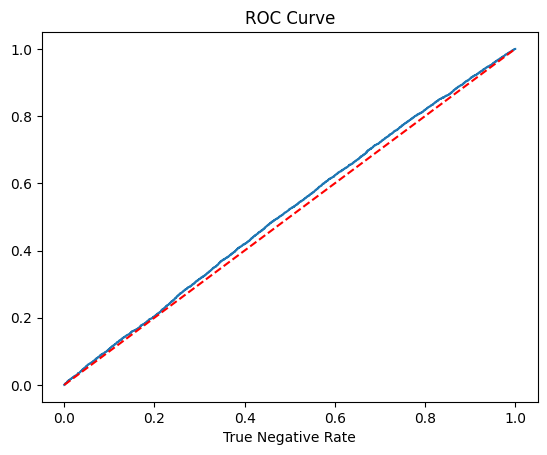

In [187]:
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('True Negative Rate')
plt.plot([0,1],[0,1],'r--')

Test Data

In [188]:
roc_auc_score(y_train,train_proba[:,1])

0.5150345431471053

In [189]:
confusion_matrix(y_test,test_pred)

array([[3396, 3835],
       [3202, 3965]])

In [190]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.51      0.47      0.49      7231
           1       0.51      0.55      0.53      7167

    accuracy                           0.51     14398
   macro avg       0.51      0.51      0.51     14398
weighted avg       0.51      0.51      0.51     14398



In [191]:
test_proba=bankdata1.predict_proba(X_test)
test_proba

array([[0.47464482, 0.52535518],
       [0.4776345 , 0.5223655 ],
       [0.50459617, 0.49540383],
       ...,
       [0.52136074, 0.47863926],
       [0.49013789, 0.50986211],
       [0.48063129, 0.51936871]])

In [192]:
test_proba[:,1]

array([0.52535518, 0.5223655 , 0.49540383, ..., 0.47863926, 0.50986211,
       0.51936871])

In [193]:
fpr,tpr,thresh=roc_curve(y_train,train_proba[:,1])

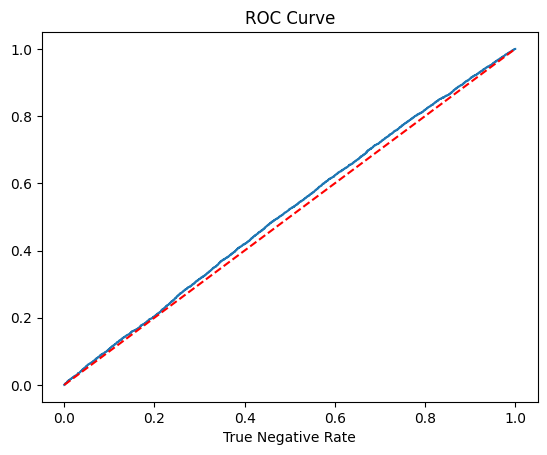

In [194]:
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('True Negative Rate')
plt.plot([0,1],[0,1],'r--')

In [195]:
roc_auc_score(y_test,test_proba[:,1])

0.5132817774856127

from the above model that before upsampling and after upsmapling we can see that the accuray has been reduced that before upsampling the acuracy is 0.89 or 89% and after upsampling the accuracy is about 0.51 0r 51%, but we can obsere that the data has been blanced.